# EDA Final Report

##### Joshua Pasaye

##### 11 March 2025

### Introduction

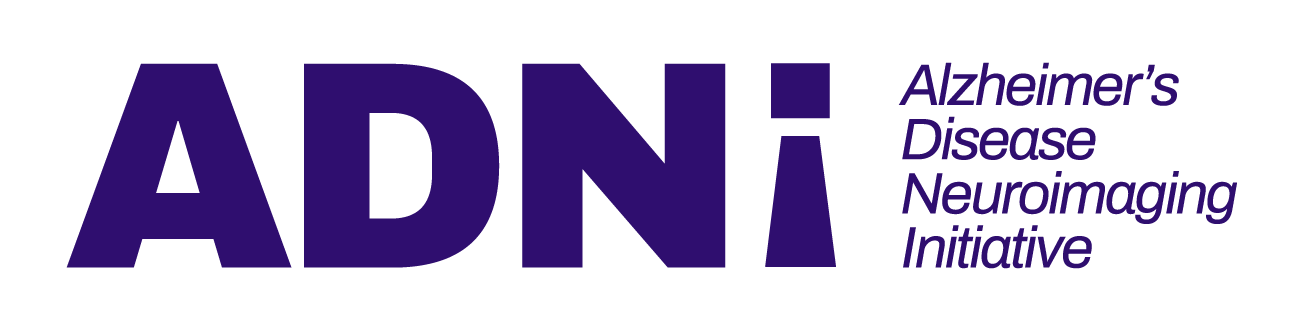

The goal of the project is to access the relationship between cognitive performance on the MMSE and APOE4 gene carriers over diagnoses and time within the ADNI study. The ADNI study is a longitudinal, multi-center, observational study across the US and Canada. ADNI study data is collected in the human brain across normal cognition (NC), mild cognitive impairment (MCI), and Alzheimer's Disease (AD) and dementia.

I hope to learn about how genetic factors, which can increase risk for developing dementia, relate to cognitive performance and if we can predict the decline seen in longitudinal neuropsychological evaluation based on baseline diagnosis and APOE4 genetic status. According to the Cleveland Clinic, an estimated 15% to 25% of the population has at least one copy of the APOE4 gene, and roughly 2-5% have two copies$^{[1]}$.

I think that this data will reveal individuals diagnosed with MCI or AD that have APOE4+ status will show greater decline in MMSE overall score over time than individuals diagnosed with MCI or AD that are APOE4-. Additionally, I think that both groups will show more cognitive decline than individuals who are cognitive normal, though it may be interesting to see people who started as cognitively unimpaired and then developed dementia and if the APOE4 status plays a role in that relationship.

***
*Source*
1. Professional, Cleveland Clinic Medical. “APOE Gene Test.” Cleveland Clinic, August 27, 2024. https://my.clevelandclinic.org/health/diagnostics/apoe-gene-test.

### Data Explained

The ADNI study's main goals are to improve how doctors diagnosis patients with AD, and to provide data to researchers around the world. A link to learn about the ADNI database can be [here](https://adni.loni.usc.edu/about/) and a link to my data can be found [here](https://nuwildcat-my.sharepoint.com/:f:/g/personal/jep9731_ads_northwestern_edu/Eqsx_EmjTPpKv_mNo6sknsgBlyVsYtKnZNHu57AnEJ5WuA?e=620QBc).

For my report, I need to achieve the following steps before analysis:
* Remove unnecessary columns
* Change numeric variables that should be categorical factors
* Add any additional columns as necessary
* Remove any duplicate and missing values
* Merge individual dataframes together into one final dataframe

**Table 1. Data dictionary**

| Variable Name | Variable Type | | Description |
| ------------- | --------------| --------------- | ----------- |
| PHASE | object | ADNI study phase |
| RID | int64 | Participant roster ID |
| VISCODE2 | object | Translated visit code |
| VISDATE | object | Visit date |
| PTGENDER | object | Participant gender |
| PTDOB | object | Participant date of birth |
| PTEDUCAT | float64 | Participant education (Years) |
| PTETHCAT | object | Participant ethnic category |
| PTRACCAT | object | Participant racial category |
| DIAGNOSIS | object | Describes the participant's current diagnosis |
| MMSCORE | float64 | MMSE total score (out of 30) |
| GENOTYPE | object | Apolipoprotein E (Apo-E) Genotype |
| AGE* | int64 | Calculated age at visit |
| APOE4_status* | object | APOE4 allele carrier (positive/negative) |
| APOE4_status_num* | int64 | APOE4 allele carrier binary |
| *Not found in data, will be created during the report |

[Here](https://adni.loni.usc.edu/data-samples/data-dictionary-search/)$^{[1]}$ is a link to the data dictionary that I used to help with the descriptions of the variables.
***
*Sources cited*
1. “Alzheimer’s Disease Neuroimaging Initiative,” ADNI, n.d., https://adni.loni.usc.edu/data-samples/data-dictionary-search/.

### Results

In [7]:
# Load modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display full
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
df = pd.read_csv('ADNI_dataset_final.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PHASE             1810 non-null   object 
 1   RID               1810 non-null   int64  
 2   VISCODE2          1810 non-null   object 
 3   VISDATE           1810 non-null   object 
 4   GENOTYPE          1810 non-null   object 
 5   APOE4_status      1810 non-null   object 
 6   DIAGNOSIS         1810 non-null   object 
 7   PTGENDER          1810 non-null   object 
 8   PTDOB             1810 non-null   object 
 9   PTEDUCAT          1810 non-null   float64
 10  PTETHCAT          1810 non-null   object 
 11  PTRACCAT          1810 non-null   object 
 12  Age               1810 non-null   int64  
 13  MMSCORE           1810 non-null   float64
 14  APOE4_status_num  1810 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 212.2+ KB


#### Descriptive Statistics

An important first step is to examine the descriptive statistics and plot the data to determine if there seems to be a relationship between APOE4 status and MMSE total score by the diagnostic categories.

In [12]:
desc_stats = df.groupby(['APOE4_status', 'DIAGNOSIS'])['MMSCORE'].describe()
print(desc_stats)

                        count       mean       std   min   25%   50%   75%  \
APOE4_status DIAGNOSIS                                                       
Negative     AD         302.0  26.208609  3.547428   5.0  24.0  27.0  29.0   
             MCI        454.0  25.966960  3.811365   4.0  24.0  27.0  29.0   
             NC         259.0  26.617761  3.351014  12.0  25.0  28.0  29.0   
Positive     AD         230.0  26.391304  3.571346   8.0  25.0  27.0  29.0   
             MCI        351.0  26.227920  3.644082   8.0  24.0  27.0  29.0   
             NC         214.0  26.028037  3.564188  13.0  24.0  27.0  29.0   

                         max  
APOE4_status DIAGNOSIS        
Negative     AD         30.0  
             MCI        30.0  
             NC         30.0  
Positive     AD         30.0  
             MCI        30.0  
             NC         30.0  


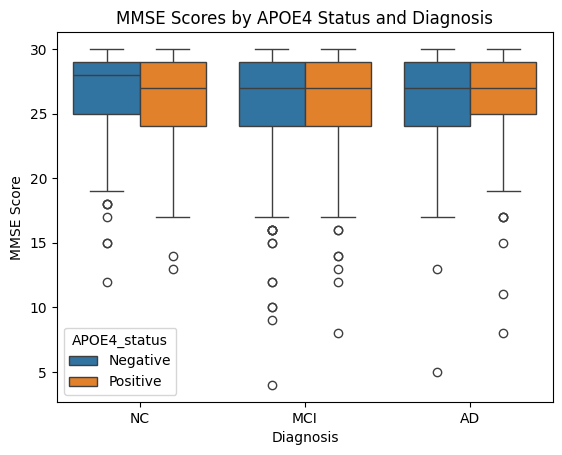

In [13]:
# Boxplot of MMSE scores by APOE4 status and diagnosis
dx_order = ['NC', 'MCI', 'AD'] # Create order

sns.boxplot(x='DIAGNOSIS', y='MMSCORE', hue='APOE4_status', data=df, order=dx_order)
plt.title('MMSE Scores by APOE4 Status and Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('MMSE Score')
plt.show();

Based on the visualization above, there seems to be a difference between the `Positive` and `Negative` APOE4 status in the `NC` diagnostic category, however, there seems to be no difference between the `MCI` or `AD` diagnostic categories. 

However, to look at the patterns over time, it will be better to make a line plot with the `VISCODE2` variable on the x-axis to visualize any relationship between APOE4 status and MMSE total score.

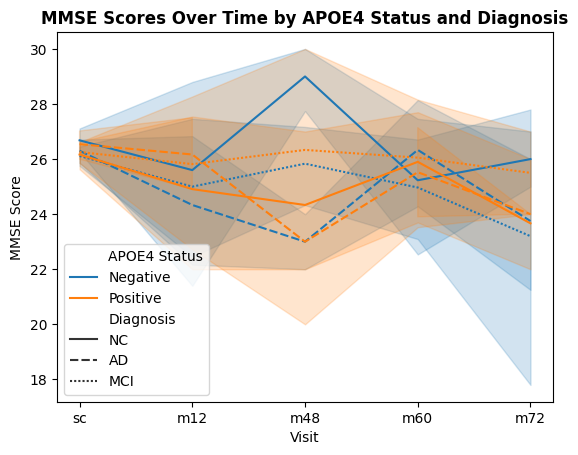

In [15]:
# Create VISCODE2 order
visit_order = ['sc', 'm12', 'm48', 'm60', 'm72']

# Convert VISCODE2 to a categorical variable with the specified order
df['VISCODE2'] = pd.Categorical(df['VISCODE2'], categories=visit_order, ordered=True)

# Create lineplot
ax= sns.lineplot(data=df, x='VISCODE2', y='MMSCORE', hue='APOE4_status', style='DIAGNOSIS')

# Customize plot
plt.title('MMSE Scores Over Time by APOE4 Status and Diagnosis', fontweight='bold')
plt.xlabel('Visit')
plt.ylabel('MMSE Score')

# Get the legend object
legend = ax.get_legend()

# Change the title for the hue legend
legend.texts[0].set_text('APOE4 Status')

# Change the title for the style legend
# Determine the starting index for style legend labels
num_hue_labels = len(df['APOE4_status'].unique()) + 1  # +1 for the "New Category Title"
legend.texts[num_hue_labels].set_text('Diagnosis')

# Show the plot
plt.show();

Based on the line plot, there seems to be some difference between the `m48` with APOE4 status in the `NC` diagnostic category. The other diagnostic categories are not showing much difference between the APOE4 status, however more analysis will need to be performed to understand the relationship between cognitive performance and APOE4 status in the diagnostic groups.

#### Prevalence of APOE4+ status

Next, I want to approximate the percentage of APOE4+ status individuals in each diagnostic category. This will give me a sense of how many APOE4+ individuals exist in each diagnostic category.

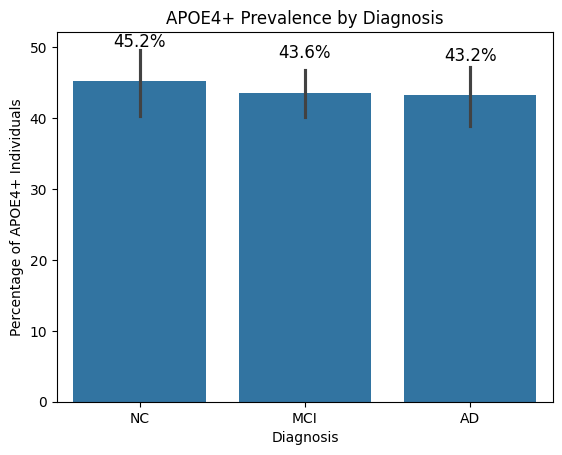

In [19]:
# Create order
dx_order = ['NC', 'MCI', 'AD']

# Convert APOE4_status to numeric
df['APOE4_status_num'] = df['APOE4_status'].replace({'Positive': 1, 'Negative': 0})

# Create barplot
sns.barplot(data=df, x='DIAGNOSIS', y='APOE4_status_num', order=dx_order, 
            estimator=lambda x: sum(x) / len(x) * 100, errorbar='ci')

# Annotate bars with percentage values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,  # X position
        height + 4.9,                      # Y position (slightly above the bar)
        f'{height:.1f}%',                # Text (percentage value)
        ha='center',                     # Horizontal alignment
        fontsize=12
    )

# Customize plot
plt.title('APOE4+ Prevalence by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage of APOE4+ Individuals')

# Show plot
plt.show();

Based on the plot above, it seems that the `NC` diagnosis has a slightly higher prevalence of APOE4 positive status compared to the other diagnostic categories.

#### Correlation

Now, I will determine what the relationship exists for the APOE4 status and MMSE total score variables between the diagnostic categories by running a correlation. This will help determine if there is a relationship between the variables and the directionality of that relationship. I found code on [this Medium article](https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406) that demonstrates how to perform a Point-biserial correlation.

In [23]:
from scipy.stats import pointbiserialr

# Perform point-biserial correlation
# Initialize a list to store results
results = []

# Group data by diagnosis
for diagnosis, group in df.groupby('DIAGNOSIS'):
    # Calculate point-biserial correlation for the group
    correlation, p_value = pointbiserialr(group['MMSCORE'], group['APOE4_status_num'])
    
    # Append results to the list
    results.append({
        'Diagnosis': diagnosis,
        'Correlation': correlation,
        'P-value': p_value
    })

# Convert results to a dataframe
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

  Diagnosis  Correlation   P-value
0        AD     0.025479  0.557616
1       MCI     0.034629  0.326454
2        NC    -0.084975  0.064815


Based on the Point-biserial correlation, there seems to be a trending statistical weakly negative correlation between APOE4 status and MMSE score with an $R^{2}$ of -.08 and a p-value of .065 with the NC diagnosis group. However, since this is a binary variable (i.e., Positive = 1 or Negative = 0) with a continuous variable, the correlation may not be the best way to determine a relationship between the variables.

#### Grouped T.Test

I will move onto group analysis between the MMSE score and the APOE4+ and APOE4- groups. I will perform a grouped t.test to determine if there is a difference between the different groups.

In [27]:
from scipy.stats import ttest_ind
from itertools import product

# Get unique combinations of diagnosis and time points
diagnoses = df['DIAGNOSIS'].unique()
time_points = df['VISCODE2'].unique()

# Initialize a list to store results
results = []

# Iterate over all combinations
for diagnosis, time_point in product(diagnoses, time_points):
    # Filter data for the current group
    group = df[(df['DIAGNOSIS'] == diagnosis) & 
                         (df['VISCODE2'] == time_point)]
    apoe4_positive = group[group['APOE4_status_num'] == 1]['MMSCORE']
    apoe4_negative = group[group['APOE4_status_num'] == 0]['MMSCORE']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(apoe4_positive, apoe4_negative)
    
    # Append results to the list
    results.append({
        'Diagnosis': diagnosis,
        'Time Point': time_point,
        'APOE4+ Mean MMSE': apoe4_positive.mean(),
        'APOE4- Mean MMSE': apoe4_negative.mean(),
        'T-statistic': t_stat,
        'P-value': p_value
    })

# Convert results to a dataframe
results_df = pd.DataFrame(results)
results_df

,Diagnosis,Time Point,APOE4+ Mean MMSE,APOE4- Mean MMSE,T-statistic,P-value
0,NC,sc,26.165775,26.680851,-1.555295,0.120629
1,NC,m60,25.900000,25.230769,0.386858,0.702753
2,NC,m48,24.333333,29.000000,-3.162278,0.025031
3,NC,m12,24.909091,25.600000,-0.266232,0.793941
4,NC,m72,23.666667,26.000000,-1.355544,0.268267
5,AD,sc,26.541237,26.301115,0.722409,0.470409
6,AD,m60,25.523810,26.333333,-0.620050,0.538741
7,AD,m48,23.000000,23.000000,0.000000,1.000000
8,AD,m12,26.166667,24.333333,1.392098,0.182941
9,AD,m72,24.000000,23.750000,0.111629,0.916495


From the grouped *t.test*, the mean APOE4+ MMSE score significantly lower than the mean APOE4- MMSE score at the `m48` time point, with a *t = -3.16* and a *p-value = .025*. Specifically, the mean APOE4+ MMSE score was roughly 4.7 points lower than the mean APOE4- MMSE score. However, no other diagnostic category and time point configuration was significantly different between the APOE4+ and APOE4- statuses.

#### Linear Mixed-Effects Model

Lastly, I will perform a mixed-effects model, which will account for individual variability between each of the subjects.

In [31]:
import warnings
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Fit a mixed-effects model
model = smf.mixedlm(
    "MMSCORE ~ APOE4_status * VISCODE2 * DIAGNOSIS",
    data=df,
    groups=df['RID']  # Subject ID as random effect
)
result = model.fit()

# Display model summary
print(result.summary())

                                Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                MMSCORE   
No. Observations:                 1810                   Method:                            REML      
No. Groups:                       1810                   Scale:                             6.5271    
Min. group size:                  1                      Log-Likelihood:                    -4850.2812
Max. group size:                  1                      Converged:                         Yes       
Mean group size:                  1.0                                                                 
------------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

Based on the mixed effects model, there seems to be no relationship between the APOE4+ status, time, and rate of cognitive decline based on the MMSE total score. However, similar to the grouped t.test, we are seems a trend toward significance at the interaction between APOE4+ and NC diagnosed participants (*z = -1.855*, *p = 0.064*). Additionally, we are seeing a trend toward significance at the interaction between visit `m48` and NC diagnosed participants (*z = 1.787*, *p = .074*).

### Summary

From the above analysis, there seems to be no relationship between `APOE4+` status and `MMSCORE` (MMSE total score) over time in the `MCI` and `AD`. This was evident in the non-significant correlation, grouped t.test, and linear mixed-effects model. 

However, there seems to be some relationship between `APOE4+` status and `MMSCORE` in the `NC` group. The correlation analysis showed that there was a trending significant weakly negative relationship bewteen `APOE4+` and `MMSE` total score in the `NC` group. This result was also found in the linear mixed-effects model, where the interaction between `APOE4+` and `NC` diagnosis, as well as visit `m48` and `NC` diagnosis. Additionally, from the grouped t.test, the `APOE4+` group had a significantly lower `MMSCORE` than the `APOE4-` group at the `m48` timepoint (*t = -3.16*, *p = .025*) by 4.7 points.

This result was not was I anticipated as I hypothesized that the APOE4+ participants would show greater cognitive decline over time. The lack of expected results could be due to the fact that there were more APOE4- than APOE+ people in each diagnositic group (roughly 43-45%). Since this gene expression is already very rare (i.e., 15-25%) in the general population, therefore, a higher *N* may be needed to see a meaningful relationship between the variables.

For future directions, I would attempt to look at other publicly available datasets with the same information to increase the prevelenance of `APOE4+` to determine a relationship between `MSSCORE`. Additionally, for the linear mixed-effects model, it would be good to examine other factors (e.g., age, education, gender, race, ethnicity) as covariates to account individual variability between subjects.